In [73]:
import sys
import os
import numpy as np
from scipy.optimize import curve_fit
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime
import pdb #python debugger
from timeit import default_timer as timer #timer
from collections import OrderedDict
import importlib
sys.path.insert(1, '/Users/ryanlopez/ABPTutorial/c++') #Connects to ABP Folder github.com/ryanlopezzzz/ABPTutorial
from cppmd.builder import *
import cppmd as md
import read_data as rd #reads snapshot text data
import directories #used to create directories for saving data
import Physical_Quantities.vorticity as vorticity
import Physical_Quantities.flocking_factors as flocking_factors
import Physical_Quantities.fourier_calculations as fc
import Physical_Quantities.various as various
import Physical_Quantities.MSD as MSD
importlib.reload(vorticity)
importlib.reload(fc)
importlib.reload(MSD)

<module 'Physical_Quantities.MSD' from '/Users/ryanlopez/Desktop/Python_Programs/Dr_Marchetti_Research/ABP/Physical_Quantities/MSD.py'>

In [65]:
#Directory where all data is saved
save_dir = "/Users/ryanlopez/Desktop/Python_Programs/Dr_Marchetti_Research/Server_Data"
exp_folder_name = "J_Packing_Phase_Diagram" #Folder name of experiment directory
exp_dir = os.path.join(save_dir, exp_folder_name)
run_dir = os.path.join(exp_dir, 'J=0.3600_and_packing=1.0000')

snapshot_dir = os.path.join(run_dir, "snapshot_data/")
exp_data = rd.get_exp_data(snapshot_dir)
dir_cross_vel, dir_cross_vel_norm = various.get_dir_cross_vel(exp_data)

dir_cross_vel= dir_cross_vel/0.03

In [70]:
first_msd, _ = MSD.get_MSD_sim_data(exp_data, 70,subtract_avg_disp=True)
second_msd = MSD.new_MSD_sim_data(exp_data,70,subtract_avg_disp=True)

par_msd = MSD.new_MSD_sim_data(exp_data,70,subtract_avg_disp=True, msd_type = 'parallel')
perp_msd = MSD.new_MSD_sim_data(exp_data,70,subtract_avg_disp=True, msd_type = 'perpendicular')

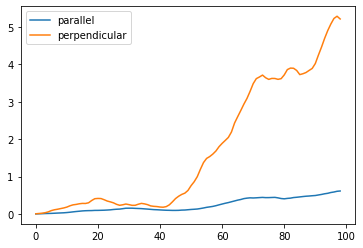

In [74]:
#plt.plot(first_msd, label='first')
#plt.plot(second_msd, label="second")

plt.plot(par_msd, label='parallel')
plt.plot(perp_msd, label="perpendicular")

plt.legend()

In [31]:
print(first_msd)
print(second_msd)

[0.00426358 0.01218269 0.02060654 0.03880793 0.07814329 0.11852469
 0.13645052 0.18265932 0.17495387 0.17174138 0.12766711 0.10149168
 0.07842904 0.06074978 0.0699276  0.07566371 0.09400974 0.12225492
 0.17301192 0.29086355 0.36495029 0.49734047 0.5831941  0.53926237
 0.41224692 0.27724304 0.1842064  0.1769641  0.23396243 0.30836214
 0.30255328 0.25747187 0.23832455 0.21303084 0.18843781 0.19991276
 0.20670684 0.18921871 0.16595222 0.13212224 0.10915736 0.09738001
 0.08790583 0.08215243 0.10447077 0.18398676 0.30094896 0.47289569
 0.72547394 1.04121767 1.4115946  1.54857585 1.84022381 1.9353328
 1.68186934 1.6330852  1.60413375 1.63686631 1.61404164 1.5675969
 1.41809213 1.53908559 1.64944092 1.53973113 1.71066463 1.88641104
 2.00610604 1.9920021  1.77975143 1.97960784 2.28015599 2.78180288
 3.07388025 3.08754245 3.22200447 3.12318538 2.88370272 3.03231607
 3.27398742 3.37007977 3.35396879 3.34941446 3.19004363 3.09178927
 2.78791212 2.75015549 2.70815914 2.50089286 2.0420088  2.041490

In [68]:
times = np.linspace(0,100,100)
def save_fig_pdf(base_filename, extra_label):
    save_filename = os.path.join(base_filename, extra_label)
    plt.savefig(save_filename, formate='pdf', bbox_inches='tight')
#os.mkdir(os.path.join(run_dir, 'images'))
images_dir=os.path.join(run_dir, 'images')

Text(0.5, -0.05, '$\\phi=0.75,Dr=0.05$')

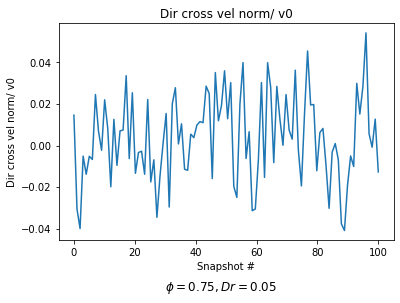

In [69]:
fig, ax = plt.subplots()
plt.plot(times,dir_cross_vel_norm)
plt.title(r"Dir cross vel norm/ v0")
plt.xlabel('Snapshot #')
plt.ylabel(r'Dir cross vel norm/ v0')
fig.text(.5, -0.05, r"$\phi=0.75,Dr=0.05$", ha='center', fontsize=12)
#save_fig_pdf(images_dir, 'dir_cross_vel_norm.pdf')

In [71]:
print(np.average(np.abs(dir_cross_vel_norm)))

0.017046257122960855
